# Analyse Exploratoire

### Import des modules

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from ydata_profiling import ProfileReport

### Analyse Exploratoire

In [182]:
building_consumption = pd.read_csv("./2016_Building_Energy_Benchmarking.csv")

In [183]:
# On regarde comment un batiment est défini dans ce jeu de données 
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [184]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

Qelques pistes d'analyse : 

* Identifier les colonnes avec une majorité de valeurs manquantes ou constantes en utilisant la méthode value_counts() de Pandas
* Mettre en evidence les différences entre les immeubles mono et multi-usages
* Utiliser des pairplots et des boxplots pour faire ressortir les outliers ou des batiments avec des valeurs peu cohérentes d'un point de vue métier 

Pour vous inspirer, ou comprendre l'esprit recherché dans une analyse exploratoire, vous pouvez consulter ce notebook en ligne : https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python. Il ne s'agit pas d'un modèle à suivre à la lettre ni d'un template d'analyses attendues pour ce projet. 

# 

In [185]:
def simple_distance(lat, lon):
    # Coordonnées du centre (Pike Place)
    center_lat = 47.6062
    center_lon = -122.3321
    
    # Conversion degrés -> km
    # 1 deg lat = 111.32 km
    # 1 deg lon = 111.32 * cos(lat) km
    
    # Facteur de correction pour la longitude à Seattle (fixe pour simplifier)
    # cos(47.6°) = 0.674
    lon_scale = np.cos(np.radians(center_lat)) 
    
    diff_lat_km = (lat - center_lat) * 111.32
    diff_lon_km = (lon - center_lon) * 111.32 * lon_scale
    
    return np.sqrt(diff_lat_km**2 + diff_lon_km**2)

In [186]:
def analyser_colonne(df, col):
    """
    Analyse complète d'une colonne : stats, valeurs manquantes et graphiques adaptés.
    """
    print(f"Analyze de la colonne : {col}")
    print("-" * 50)
    
    # 1. Infos sur les valeurs manquantes
    n_missing = df[col].isna().sum()
    pct_missing = df[col].isna().mean() * 100
    print(f"Valeurs manquantes : {n_missing} ({pct_missing:.2f}%)")
    
    # 2. Traitement selon le type de données
    # Si c'est numérique (int ou float)
    if pd.api.types.is_numeric_dtype(df[col]):
        print("\n--- Statistiques descriptives ---")
        print(df[col].describe())
        
        # Création des graphiques (Histogramme à gauche, Boxplot à droite)
        fig, ax = plt.subplots(1, 2, figsize=(14, 5))
        
        # Histogramme pour voir la distribution
        sns.histplot(df[col], kde=True, ax=ax[0], color='skyblue')
        ax[0].set_title(f"Distribution de {col}")
        
        # Boxplot pour voir les outliers
        sns.boxplot(x=df[col], ax=ax[1], color='orange')
        ax[1].set_title(f"Boxplot de {col}")
        
        plt.tight_layout()
        plt.show()
        
    # Si c'est catégoriel (object/category)
    else:
        print("\n--- Fréquences (Top 10) ---")
        # On combine le compte brut et le pourcentage
        vc = df[col].value_counts()
        vc_norm = df[col].value_counts(normalize=True) * 100
        stats = pd.DataFrame({'Total': vc, 'Pourcentage': vc_norm})
        print(stats.head(10)) # On affiche que le top 10 pour ne pas polluer
        
        # Graphique : Barplot
        plt.figure(figsize=(10, 6))
        # On affiche seulement le top 15 catégories pour que le graphique reste lisible
        sns.countplot(y=col, data=df, order=vc.index[:15], palette="viridis")
        plt.title(f"Top 15 catégories pour {col}")
        plt.show()

Analyze de la colonne : Electricity(kWh)
--------------------------------------------------
Valeurs manquantes : 9 (0.27%)

--- Statistiques descriptives ---
count    3.367000e+03
mean     1.086639e+06
std      4.352478e+06
min     -3.382680e+04
25%      1.874229e+05
50%      3.451299e+05
75%      8.293178e+05
max      1.925775e+08
Name: Electricity(kWh), dtype: float64


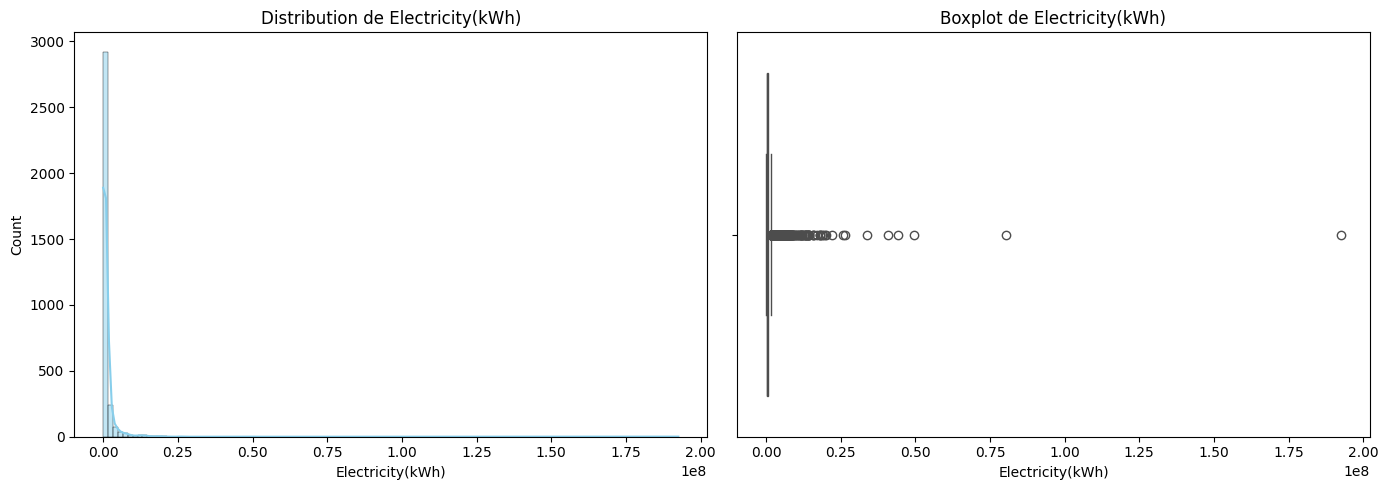

In [187]:
analyser_colonne(building_consumption,"Electricity(kWh)")

In [188]:
# Affichez les lignes où l'électricité dépasse un seuil (ajustez le seuil selon votre graph)
outliers = building_consumption[building_consumption['Electricity(kWh)'] > 50000000] # Exemple: 100 millions
# Affichez le type de bâtiment pour comprendre
print(outliers[['BuildingType', 'PrimaryPropertyType', 'Electricity(kWh)']])

        BuildingType PrimaryPropertyType  Electricity(kWh)
558   NonResidential               Other        80460872.0
3274          Campus          University       192577488.0


Nouveau seuil max : 12597213 kWh
Lignes restantes : 3332
Analyze de la colonne : Electricity(kWh)
--------------------------------------------------
Valeurs manquantes : 0 (0.00%)

--- Statistiques descriptives ---
count    3.332000e+03
mean     8.266661e+05
std      1.415296e+06
min      0.000000e+00
25%      1.863301e+05
50%      3.409549e+05
75%      8.036679e+05
max      1.256277e+07
Name: Electricity(kWh), dtype: float64


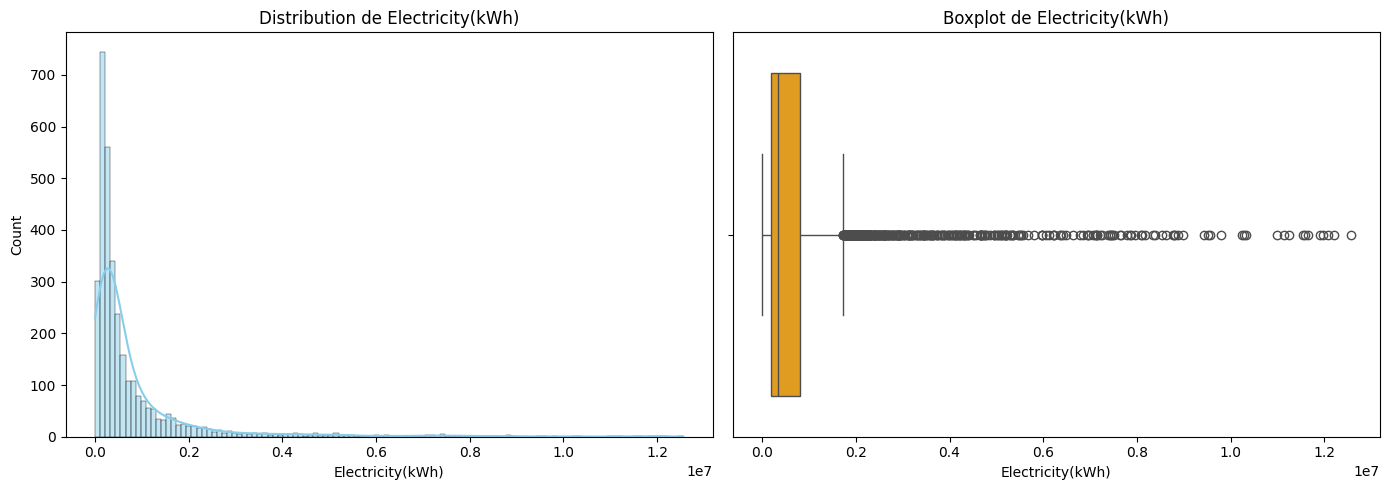

In [189]:
# On va supprimer les valeurs négatifs et le top 1%
# 1. On garde uniquement les valeurs positives
df_clean = building_consumption[building_consumption['Electricity(kWh)'] >= 0].copy()
# 2. On filtre les valeurs extrêmes (ex: on garde 99% des données)
# Le quantile 0.99 nous donne la valeur en dessous de laquelle se 
limite_haute = df_clean['Electricity(kWh)'].quantile(0.99)
print(f"Nouveau seuil max : {limite_haute:.0f} kWh")
# On ne garde que ce qui est sous la limite
df_clean = df_clean[df_clean['Electricity(kWh)'] < limite_haute]
print(f"Lignes restantes : {df_clean.shape[0]}")
# 3. On ré-analyse
analyser_colonne(df_clean, 'Electricity(kWh)')

In [190]:
print("Villes uniques :", df_clean['City'].unique())
print("Etats uniques :", df_clean['State'].unique())

# On supprime les données liées à l'identification des buildings
# On va ppeut être juste garder neighborhood car il peut y avoir des similitudes selon les quartiers
# ainsi que la longitude et latitude qui pourrait être utile. On a aussi OSEBuildingID qui est un ID unique par bâtiment
# on ne vas pas entraîner le modèle sur cette donnée mais on pourrait l'avoir en index, pour manipuler les données
cols_to_drop = [
    'Order',           
    'City',            # normalement tout est Seattle 
    'State',           # pareil tout devrait être dans l'état de Washington
    'Address',         # redondant
    'PropertyName',    
    'TaxParcelIdentificationNumber', 
    'ZipCode',
    'CouncilDistrictCode'
]

# On supprime ce qui existe dans le dataframe
cols_to_drop = [c for c in cols_to_drop if c in df_clean.columns]
df_clean = df_clean.drop(columns=cols_to_drop)

Villes uniques : ['Seattle']
Etats uniques : ['WA']


In [191]:
# La colonne Compliance status indique si les relevés énergétiques sont fiables - pour faire simple ce qui est
# indiqué comme compliant c'est de la source sure est vérifiée, les autres sont soit manquante soit indiquée comme erreur
# la donnée semble fausse mais a été indiqué par le proprio comme vraie

# 1. Répartition des status de "Compliance"
print("Répartition des status :")
print(df_clean['ComplianceStatus'].value_counts())

# 2. On choisit de garder QUE les compliants (on pourrait garder les errors car ils pourraint être vrai même si bizarre)
df_clean = df_clean[df_clean['ComplianceStatus'] == 'Compliant'].copy()

# 3. On peut supprimer la colonne ensuite car elle ne nous sert plus à rien
df_clean = df_clean.drop(columns=['ComplianceStatus'])

print(f"Il reste {df_clean.shape[0]} bâtiments fiables.")

Répartition des status :
ComplianceStatus
Compliant                       3172
Error - Correct Default Data     113
Non-Compliant                     32
Missing Data                      15
Name: count, dtype: int64
Il reste 3172 bâtiments fiables.


Différences : 2616 sur 3172
Analyze de la colonne : SecondLargestPropertyUseType
--------------------------------------------------
Valeurs manquantes : 1697 (50.27%)

--- Fréquences (Top 10) ---
                                Total  Pourcentage
SecondLargestPropertyUseType                      
Parking                           976    58.129839
Office                            215    12.805241
Retail Store                      155     9.231686
Other                              59     3.513996
Restaurant                         40     2.382370
Non-Refrigerated Warehouse         33     1.965456
Multifamily Housing                18     1.072067
Fitness Center/Health Club/Gym     17     1.012507
Supermarket/Grocery Store          14     0.833830
Data Center                        13     0.774270


/tmp/ipykernel_5378/1492223176.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=vc.index[:15], palette="viridis")


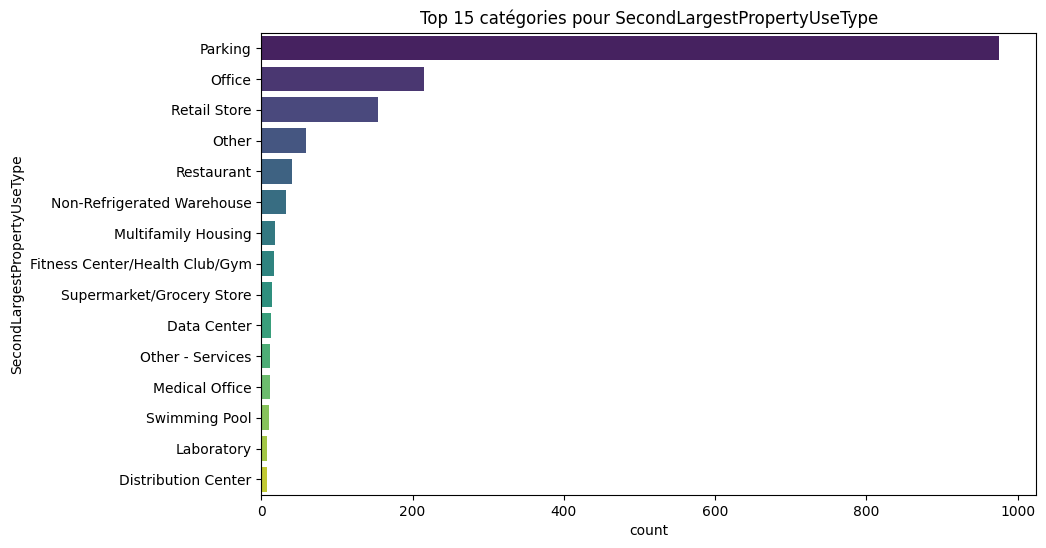

In [192]:
# différence entre largest et primary propertyType
diff = df_clean[df_clean['LargestPropertyUseType'] != df_clean['PrimaryPropertyType']]
print(f"Différences : {len(diff)} sur {len(df_clean)}")
analyser_colonne(building_consumption,"SecondLargestPropertyUseType")

In [193]:
# comme on peut le voir la deuxième utilisation du bâtiment est principalement pour des parkings
# hors c'est une info qu'on a déjà dans PropertyGFAParking, donc on peu supprimer également cette colonne
# ainsi que celle concernant l'utilisation n°3 du bâtiment (trop de vide)

# autre remarque, PrimaryPropertyType et LargestPropertyType semblent différentes... à investiguer 

In [194]:
# Compter le nombre de catégories uniques
n_primary = df_clean['PrimaryPropertyType'].nunique()
n_largest = df_clean['LargestPropertyUseType'].nunique()

print(f"PrimaryPropertyType a {n_primary} catégories uniques.")
print(f"LargestPropertyUseType a {n_largest} catégories uniques.")

# Afficher un exemple des différences pour comprendre la nuance
diff = df_clean[df_clean['LargestPropertyUseType'] != df_clean['PrimaryPropertyType']]
print("\n--- Exemple de différences ---")
print(diff[['PrimaryPropertyType', 'LargestPropertyUseType']].head(10))

PrimaryPropertyType a 23 catégories uniques.
LargestPropertyUseType a 55 catégories uniques.

--- Exemple de différences ---
            PrimaryPropertyType                 LargestPropertyUseType
5                         Other                         Police Station
7                         Other  Other - Entertainment/Public Assembly
9          Mid-Rise Multifamily                    Multifamily Housing
15                        Other                                Library
16                        Other         Fitness Center/Health Club/Gym
18           Mixed Use Property                    Social/Meeting Hall
20                        Other                             Courthouse
24                   University                     College/University
25                        Other                  Automobile Dealership
32  Small- and Mid-Sized Office                                 Office


In [195]:
#  j'image que 23 catégories c'est déjà emplement suffisant.
# En réalité le mieux serait toujours d'entrainer un modèle avec l'un et un modèle avec l'autre afin de voir si une des deux colonnes
# est plus pertinente 

# Liste des colonnes de détail à supprimer
cols_to_drop_uses = [
    'ListOfAllPropertyUseTypes',      # Trop de texte, inexploitable simplement
    'LargestPropertyUseType',         # Redondant avec PrimaryPropertyType
    'LargestPropertyUseTypeGFA',      # Redondant avec PropertyGFABuilding(s)
    'SecondLargestPropertyUseType',   # Trop de valeurs manquantes
    'SecondLargestPropertyUseTypeGFA',
    'ThirdLargestPropertyUseType',    # Trop de valeurs manquantes
    'ThirdLargestPropertyUseTypeGFA'
]

# On supprime
df_clean = df_clean.drop(columns=[c for c in cols_to_drop_uses if c in df_clean.columns])

print("Colonnes d'usage détaillées supprimées.")

Colonnes d'usage détaillées supprimées.


In [196]:
# On va tenter de voir si certaines catégories ne représentent que peu de bâtiment et les mettres dans ce cas 
# dans un plus gros sac -> other

# 1. Regardons la répartition exacte
counts = df_clean['PrimaryPropertyType'].value_counts()
print(counts)

# 2. Identifions les catégories rares (ex: moins de 50 bâtiments)
# 50 est un bon seuil pour avoir une significativité statistique
seuil = 50
categories_rares = counts[counts < seuil].index.tolist()

print(f"\nIl y a {len(categories_rares)} catégories rares (< {seuil} bâtiments) :")
print(categories_rares)

PrimaryPropertyType
Low-Rise Multifamily           952
Mid-Rise Multifamily           553
Small- and Mid-Sized Office    286
Other                          244
Warehouse                      184
Large Office                   156
Mixed Use Property             128
High-Rise Multifamily          103
Retail Store                    85
Hotel                           74
Worship Facility                69
Distribution Center             53
K-12 School                     50
Senior Care Community           44
Supermarket / Grocery Store     40
Medical Office                  38
Self-Storage Facility           28
University                      23
Residence Hall                  23
Restaurant                      12
Refrigerated Warehouse          12
Laboratory                      10
Hospital                         5
Name: count, dtype: int64

Il y a 10 catégories rares (< 50 bâtiments) :
['Senior Care Community', 'Supermarket / Grocery Store', 'Medical Office', 'Self-Storage Facility', 'U

In [197]:
# au vu des résultats ça semble peu judicier de supprimer une catégorie comme hôpital, ça donne une info plutôt crucial
# donc l'autre option si on veut regrouper serait de regrouper par ensemble ayant le même profil énergétique car ayant des usages similaires

#recap de ce qu'on a : 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3172 entries, 0 to 3375
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OSEBuildingID             3172 non-null   int64  
 1   DataYear                  3172 non-null   int64  
 2   BuildingType              3172 non-null   object 
 3   PrimaryPropertyType       3172 non-null   object 
 4   Neighborhood              3172 non-null   object 
 5   Latitude                  3172 non-null   float64
 6   Longitude                 3172 non-null   float64
 7   YearBuilt                 3172 non-null   int64  
 8   NumberofBuildings         3172 non-null   float64
 9   NumberofFloors            3172 non-null   int64  
 10  PropertyGFATotal          3172 non-null   int64  
 11  PropertyGFAParking        3172 non-null   int64  
 12  PropertyGFABuilding(s)    3172 non-null   int64  
 13  YearsENERGYSTARCertified  111 non-null    object 
 14  ENERGYSTARSco

In [198]:
# on supprime comments et Outlier car ce sont des colonnes vides...
df_clean = df_clean.drop( columns=['Comments','Outlier'])

In [199]:

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3172 entries, 0 to 3375
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OSEBuildingID             3172 non-null   int64  
 1   DataYear                  3172 non-null   int64  
 2   BuildingType              3172 non-null   object 
 3   PrimaryPropertyType       3172 non-null   object 
 4   Neighborhood              3172 non-null   object 
 5   Latitude                  3172 non-null   float64
 6   Longitude                 3172 non-null   float64
 7   YearBuilt                 3172 non-null   int64  
 8   NumberofBuildings         3172 non-null   float64
 9   NumberofFloors            3172 non-null   int64  
 10  PropertyGFATotal          3172 non-null   int64  
 11  PropertyGFAParking        3172 non-null   int64  
 12  PropertyGFABuilding(s)    3172 non-null   int64  
 13  YearsENERGYSTARCertified  111 non-null    object 
 14  ENERGYSTARSco

In [200]:
# au vu d'un premier rapport de profilage, on supprime les colonnes très fortements corrélés
df_clean = df_clean.drop( columns=['Electricity(kBtu)','NaturalGas(kBtu)','SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)']) 

# fonction permettant de trouver les colonnes corrélés entre elles, (dont la valeur de corrélation est supérieur au seuil donné)
def get_highly_correlated_columns(df, threshold=0.9):
    """
    Calcule la matrice de corrélation et renvoie :
    1. La matrice complète.
    2. Un dictionnaire des paires corrélées.
    3. Une liste de colonnes recommandées à supprimer.
    
    Args:
        df (pd.DataFrame): Le dataframe à analyser.
        threshold (float): Le seuil de corrélation (ex: 0.9 pour 90%).
        
    Returns:
        corr_matrix, correlated_pairs, to_drop
    """
    # 1. Calcul de la matrice de corrélation (valeurs absolues)
    # on utilise numeric_only=True pour éviter les erreurs sur du texte
    # on utilise la méthode 'spearman' pour capturer les relations non linéaires
    corr_matrix = df.corr(method='spearman', numeric_only=True).abs()

    # 2. Sélection du triangle supérieur de la matrice
    # (On exclut la diagonale et le triangle inférieur pour ne pas avoir de doublons)
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # 3. Identification des colonnes dépassant le seuil
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    # 4. (Optionnel) Récupérer les paires exactes pour analyse
    correlated_pairs = {}
    for column in to_drop:
        # Trouve la ligne (index) qui a une forte corrélation avec cette colonne
        correlated_row = upper[upper[column] > threshold].index[0]
        correlated_pairs[column] = correlated_row

    return corr_matrix, correlated_pairs, to_drop

corr_mat, pairs, drop_list = get_highly_correlated_columns(df_clean, threshold=0.8)

print(f"Proposition de colonnes à supprimer : {drop_list}")
print(f"Détails des paires : {pairs}")

Proposition de colonnes à supprimer : ['PropertyGFABuilding(s)', 'SourceEUI(kBtu/sf)', 'Electricity(kWh)', 'TotalGHGEmissions', 'GHGEmissionsIntensity']
Détails des paires : {'PropertyGFABuilding(s)': 'PropertyGFATotal', 'SourceEUI(kBtu/sf)': 'SiteEUI(kBtu/sf)', 'Electricity(kWh)': 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions': 'SiteEnergyUse(kBtu)', 'GHGEmissionsIntensity': 'NaturalGas(therms)'}


In [201]:
# au vu de nos r&sultats on peut supprimer PropertyGFATotal (c'est sensé être la somme de PropertyGFABuilding et PropertyGFAParking)
#on aussi supprimer SourceEUI ou SiteEUI ainsi que SiteEUI etTotalGHGEmissions car très corrélé avec Electricity(kwh)
cols_to_remove = ['PropertyGFATotal', 'SourceEUI(kBtu/sf)', 'SiteEUI(kBtu/sf)', 'TotalGHGEmissions', 'GHGEmissionsIntensity']
df_clean = df_clean.drop(columns=cols_to_remove)

#on recalcule histoire d'être certains de rien avoir oublié
corr_mat, pairs, drop_list = get_highly_correlated_columns(df_clean, threshold=0.8)
print(f"Nomnre de colonne numérique encore fortement corrélée : {len(drop_list)}")

Nomnre de colonne numérique encore fortement corrélée : 1


In [202]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3172 entries, 0 to 3375
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OSEBuildingID             3172 non-null   int64  
 1   DataYear                  3172 non-null   int64  
 2   BuildingType              3172 non-null   object 
 3   PrimaryPropertyType       3172 non-null   object 
 4   Neighborhood              3172 non-null   object 
 5   Latitude                  3172 non-null   float64
 6   Longitude                 3172 non-null   float64
 7   YearBuilt                 3172 non-null   int64  
 8   NumberofBuildings         3172 non-null   float64
 9   NumberofFloors            3172 non-null   int64  
 10  PropertyGFAParking        3172 non-null   int64  
 11  PropertyGFABuilding(s)    3172 non-null   int64  
 12  YearsENERGYSTARCertified  111 non-null    object 
 13  ENERGYSTARScore           2375 non-null   float64
 14  SiteEnergyUse

In [203]:
import phik

# Calcule la matrice d'association (y compris texte vs texte et texte vs chiffre)
correlation_matrix = df_clean.phik_matrix()

# 2. Masquer le triangle inférieur et la diagonale
# On garde seulement le triangle supérieur (k=1 exclut la diagonale)
mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
upper_triangle = correlation_matrix.where(mask)

# 3. "Aplatir" la matrice en une liste
# .stack() transforme les colonnes en index
correlated_pairs = upper_triangle.stack().reset_index()
correlated_pairs.columns = ['Feature_1', 'Feature_2', 'Phik_Score']

# 4. Trier par score décroissant (les plus fortes corrélations en haut)
sorted_pairs = correlated_pairs.sort_values(by='Phik_Score', ascending=False)

print("\n--- Paires avec corrélation > 0.8 ---")
high_corr = sorted_pairs[sorted_pairs['Phik_Score'] > 0.8]
print(high_corr)

interval columns not set, guessing: ['OSEBuildingID', 'DataYear', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'NaturalGas(therms)']


/home/arnaud/.cache/pypoetry/virtualenvs/projet-3-yGtptAP3-py3.13/lib/python3.13/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable DataYear for analysis 1. Dropping this column
  warnings.warn(
/home/arnaud/.cache/pypoetry/virtualenvs/projet-3-yGtptAP3-py3.13/lib/python3.13/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable DefaultData for analysis 1. Dropping this column
  warnings.warn(



--- Paires avec corrélation > 0.8 ---
                    Feature_1                 Feature_2  Phik_Score
122  YearsENERGYSTARCertified            SteamUse(kBtu)    1.000000
123  YearsENERGYSTARCertified          Electricity(kWh)    0.938207
16               BuildingType       PrimaryPropertyType    0.912801
108        PropertyGFAParking  YearsENERGYSTARCertified    0.912510
131       SiteEnergyUse(kBtu)        NaturalGas(therms)    0.909860
45               Neighborhood                  Latitude    0.894664
121  YearsENERGYSTARCertified       SiteEnergyUse(kBtu)    0.892628
101            NumberofFloors  YearsENERGYSTARCertified    0.890356
46               Neighborhood                 Longitude    0.837131
114    PropertyGFABuilding(s)  YearsENERGYSTARCertified    0.808190


In [204]:
# Au vu des résultats on va donc supprimer YearENERGYSTARCertified parce que corrélé avec pleins de chose, également Neighborhood
# car corrélé avec longitude et latitude et ces deux dernières donnent une localisation plus précise
# On va également enlever l'ID des bâtiments car inutile pour le modèle
# suprpession également de buildingType car corrélé à PrimayryPropertyType (est trop généraliste)
# On supprimer également DataYear et DefaultData car l'analyse avait révélé que ces colonnes ne contenanit qu'une valeur unique
# Finalement on va également supprimer les données qui permettent directement d'estimer la consommation du bâtiment pour 
# ne pas avoir de data leakage -> SteamUse(kBtu), Electricity(kWh), NaturalGas MAIS on va d'abord tenter de les transformer en catégories
# et garder ces colonnes si c'est pertinent

# Liste des colonnes d'énergie à tester
energy_cols = ['Electricity(kWh)', 'NaturalGas(therms)', 'SteamUse(kBtu)']

print(f"Taille totale du dataset : {len(df_clean)}")
print("-" * 30)

for col in energy_cols:
    # On compte combien de lignes sont strictement supérieures à 0
    count = (df_clean[col] > 0).sum()
    percent = (df_clean[col] > 0).mean() * 100
    
    print(f"{col} : {count} bâtiments actifs ({percent:.1f}%)")

Taille totale du dataset : 3172
------------------------------
Electricity(kWh) : 3169 bâtiments actifs (99.9%)
NaturalGas(therms) : 1983 bâtiments actifs (62.5%)
SteamUse(kBtu) : 116 bâtiments actifs (3.7%)


In [205]:
# On peut clairement supprimer la colonne Electricity(kWh) car presque tout le monde l'a
# à  voir pour SteamUse car ça pourrait indiquer un type de bâtiment particulier et être révélateur (voir également la corrélation après)
cols_to_drop = ['YearsENERGYSTARCertified', 'OSEBuildingID', 'BuildingType','Electricity(kWh)','DefaultData','DataYear']
df_clean = df_clean.drop(columns=cols_to_drop)
# transformation des colonnes steam et naturalGas en colonnes catégorielles
df_clean['Use_Steam'] = (df_clean['SteamUse(kBtu)'] > 0).astype(int)
df_clean['Use_Gas'] = (df_clean['NaturalGas(therms)'] > 0).astype(int)
# suprression des colonnes d'origine
df_clean = df_clean.drop(columns=['SteamUse(kBtu)', 'NaturalGas(therms)'])
# On refait un coup de phik pour voir si y'a des corrélations intéressantes avec les nouvelles colonnes

# On va également modifier la longitude et la latitude en une colonne "distance au centre ville" pour réduire la corrélation
# avec Neighborhood et apporter une information plus pertinente


# Application
df_clean['DistanceToCenter'] = simple_distance(df_clean['Latitude'], df_clean['Longitude'])
# Suppression des colonnes d'origine
df_clean = df_clean.drop(columns=['Latitude', 'Longitude']) 

correlation_matrix = df_clean.phik_matrix()
# /!\ Bien qu'on sache que ça ne soit pas exactement la même chose, on a tout de même une forte corrélation entre Neighborhood et DistanceToCenter
# Dans ce cas précis je vais choisir de tout de même garder les deux... Mais c'est à surveiller, on pourra potentiellement supprimer une des deux
# et aviser 


# 2. Masquer le triangle inférieur et la diagonale
# On garde seulement le triangle supérieur (k=1 exclut la diagonale)
mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
upper_triangle = correlation_matrix.where(mask)

# 3. "Aplatir" la matrice en une liste
# .stack() transforme les colonnes en index
correlated_pairs = upper_triangle.stack().reset_index()
correlated_pairs.columns = ['Feature_1', 'Feature_2', 'Phik_Score']

# 4. Trier par score décroissant (les plus fortes corrélations en haut)
sorted_pairs = correlated_pairs.sort_values(by='Phik_Score', ascending=False)

print("\n--- Paires avec corrélation > 0.8 ---")
high_corr = sorted_pairs[sorted_pairs['Phik_Score'] > 0.8]
print(high_corr)

interval columns not set, guessing: ['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'Use_Steam', 'Use_Gas', 'DistanceToCenter']

--- Paires avec corrélation > 0.8 ---
       Feature_1         Feature_2  Phik_Score
20  Neighborhood  DistanceToCenter     0.82793


In [206]:
### ATTENTION ### si l'EnergieStarScore est calculé selon la consomation d'énergie / taille du bâtiment alors on a également un 
# problème de dataLeakage - si par contre il est calculé selon par exemple un ensemble de critère comme une certaine utilisation de matériau là
# ce serait moins un problème. Pour éviter tout risque il vaut mieux également supprimer cette donnée pour ne pas tricher

df_clean = df_clean.drop(columns='ENERGYSTARScore')

In [207]:


# Génération d'un rapport de profilage
# 2. Génère le rapport
profile = ProfileReport(df_clean, title="Rapport d'Exploration")

# 3. Sauvegarde le rapport en HTML pour le voir dans ton navigateur
profile.to_file("mon_rapport.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 98.95it/s]


# pour la prochaine fois remplacer l'année de construction par une variable âge car plus parlant numériquement
# 2000 et 2026 sont plus proches d'une certaines manières que 16 et 0
# il faudra s'attaquer également à YearsENERGYSTARCertified

Modélisation 

### Import des modules 

In [ ]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes. 

En règle générale : On utilise la méthode .apply() de Pandas pour créer une nouvelle colonne à partir d'une colonne existante. N'hésitez pas à regarder les exemples dans les chapitres de cours donnés en ressource

In [ ]:
# CODE FEATURE ENGINEERING

### Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation de Pearson. Pour cela, utiisez la méthode corr() de Pandas, couplé d'un graphique Heatmap de la librairie Seaborn 
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne. Les deux méthodes d'encodage à connaitre sont le OneHotEncoder et le LabelEncoder

In [ ]:
# CODE PREPARATION DES FEATURES

### Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [ ]:
# CODE COMPARAISON DES MODELES

### Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn.

In [ ]:
# CODE OPTIMISATION ET INTERPRETATION DU MODELE